# Atividade Prática 4

## Compressão usando DCT

### Entrega: até 08/05/2020 às 23:59 no e-disciplinas

#### Nome: ________________________ N° USP: ________  ( ) Grad ( ) Pós

---
###  Revisão

A DCT foi definida na seção 3.4 a partir de uma adaptação da transformada de Fourier: um vetor $x=\overrightarrow{x}\in\mathbb{R}^N$ era duplicado de forma espelhada $\tilde{x}=(\overrightarrow{x},\overleftarrow{x})$ e as redundâncias encontradas na transformada de Fourier $\tilde{X}\in\mathbb{C}^{2N}$ eram exploradas para recodificá-la na forma de um vetor $C=\mbox{DCT}(x)\in\mathbb{R}^N$:
\begin{align*}
	C_0 &= \sqrt{\frac{1}{N}}\sum\limits_{m=0}^{N-1} x_m \\
	C_k &= \sqrt{\frac{2}{N}}\sum\limits_{m=0}^{N-1} x_m\cos\left(\frac{\pi k\left(m+\frac{1}{2}\right)}{N}\right), k = 1, 2, \dots, N-1,\\
\end{align*}

cuja transformada inversa ($x=IDCT(C)$) é

\begin{equation*}
	x_m = \sqrt{\frac{1}{N}}C_0 + \sqrt{\frac{2}{N}}\sum\limits_{k=1}^{N-1}C_k\cos\left(\frac{\pi\left(m + \frac{1}{2}\right)k}{N}\right),\ m=0,1,\ldots,N-1.
\end{equation*}

Dado o seu parentesco com a DFT, não é de se estranhar que exista uma maneira rápida $\mathcal{O}(N\log N)$ de calcular DCT($x$):

> $\mbox{DCT}(\overrightarrow{x}):$
>
>> $\mbox{calcule}\ \tilde{x}=(\overrightarrow{x},\overleftarrow{x})$
>>
>> $\mbox{calcule}\ \tilde{X}=\mbox{FFT}(\tilde{x})$
>>
>> $\mbox{defina}\ C_0=\sqrt{\frac{1}{N}}\frac{\tilde{X}_0}{2},\quad C_k=\sqrt{\frac{2}{N}}e^{-i\pi k/(2N)}\frac{\tilde{X}_k}{2},\ k=1,2,\ldots,N-1$

Implementações profissionais são certamente mais eficientes que a versão acima, embora tenham a mesma complexidade $\mathcal{O}(N\log N)$.

Vimos também o esquema simples de compressão por limiarização da seção 3.3, que pode ser aplicado tanto à FFT quanto à DCT: dado $x\in\mathbb{R}^N$ e um parâmetro de limiarização $c\in[0,1]$, faça:

> Compressão/Descompressão(x):
>
>> $\mbox{compute}\ C=DCT(x)$
>>
>> $\mbox{calcule}\ M=\max\{|C_k|,\ k=0,\ldots,N-1\}$
>>
>> $\mbox{defina}\ \tilde{C}\in\mathbb{R}^N\ \mbox{como}$    
$$\tilde{C}_k = \left\{\begin{array}{ll}
    C_k&\mbox{se}\ |C_k|\ge cM,\\
    0&\mbox{c.c.}\end{array}\right.$$
>>
>> $\mbox{calcule o sinal reconstruído como}\ \tilde{x} = IDCT(\tilde{C})$
>>
>> $\mbox{calcule a taxa de compressão como}\ P(c) = \frac{\#\{k\mid|C_k|\ge cM\}}{N}$
>>
>> $\mbox{calcule a distorção como}\ D(c) = \frac{\|x-\tilde{x}\|^2}{\|x\|^2}$
>>
>> 

O código a seguir usa a DCT (rápida) da SciPy e a compressão por limiarização da DCT em um exemplo de sinal simples com descontinuidade, usando $c=0.1$, e também mostra como a distorção se relaciona com a taxa de compressão nesse sinal:

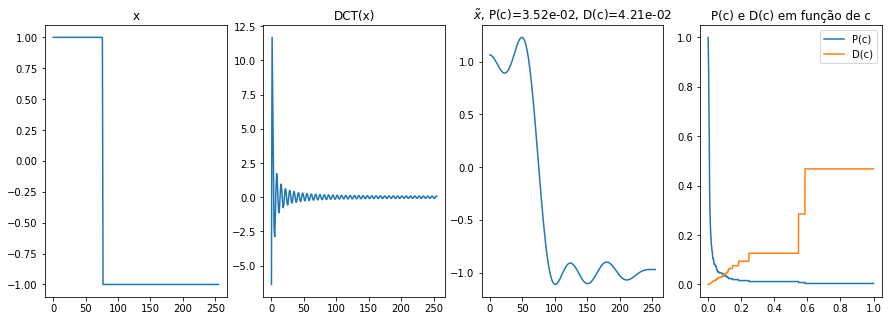

In [6]:
# importa dependências
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct, idct

# realiza compressão/descompressão de x com parâmetro de limiarização c e devolve x~, Dc e Pc
def CompDescomp(x,c):
    # calcula DCT e faz compressão por limiarização
    C=dct(x, norm='ortho')
    cM = c*np.max(abs(C)) # limiar de compressão
    CC = C*(abs(C)>=cM) # DCT comprimida
    xtil = idct(CC, norm='ortho') # sinal reconstruído
    Pc = sum(abs(C)>=cM)/x.size # taxa de compressão (proporção de coeficientes mantidos)
    if np.linalg.norm(x)**2>0:
        Dc = np.linalg.norm(x-xtil)**2/np.linalg.norm(x)**2 # distorção relativa
    else:
        Dc = np.linalg.norm(x-xtil)**2 # calcula distorção absoluta se sinal é nulo
    return xtil,Pc,Dc

# gera sinal descontínuo com 30% de +1 e o restante -1, no intervalo [0,256)
N=256;M=0.3;x = -1+2*(np.array(range(N))<M*N);

# realiza compressão/descompressão com c=0.1
xtil,Pc,Dc = CompDescomp(x,0.1)

# gera gráficos de x, DCT(x) e x_til
fig, ax = plt.subplots(1,4,figsize=(15,5))
ax[0].set_title(r'x');ax[0].plot(x)
ax[1].set_title(r'DCT(x)');ax[1].plot(dct(x, norm='ortho'))
ax[2].set_title(r'$\tilde{{x}}$, P(c)={0:.2e}, D(c)={1:.2e}'.format(Pc,Dc));ax[2].plot(xtil)

# gera gráficos de P(c) e D(c) usando a função CompDescomp
eps = 1e-3
c = np.arange(0,1+eps,eps)
Pc = np.zeros(len(c))
Dc = np.zeros(len(c))
for i in range(len(c)):
    dummy,Pc[i],Dc[i] = CompDescomp(x,c[i])
ax[3].set_title(r'P(c) e D(c) em função de c');ax[3].plot(c,Pc,label='P(c)');ax[3].plot(c,Dc,label='D(c)');
plt.legend();plt.show();

---

**Exercício 1:** 

**(a)** Escreva uma função <tt>c_ótimo(x,d)</tt> que encontra um limiar ótimo $c^*$ em função da distorção máxima $d$ admissível na compressão do sinal x. Para isso, seu código deve buscar o maior valor de $c$ (aquele que corta mais coeficientes da DCT) que satisfaz $D(c)\le d$. Sua solução $c^*$ deve possuir acurácia de $\varepsilon=0.001$ (estar a no máximo $\varepsilon$ de distância do ótimo verdadeiro).

**Dica:** você pode fazer isso tanto por busca simples (percorrendo valores de $c$ de $\varepsilon$ em $\varepsilon$) quanto por busca binária (lembre que a função $D(c)$ é monotonicamente não-decrescente, ou seja, $c_1<c_2\implies D(c_1)\le D(c_2)$). Certifique-se de que o $c^*$ devolvido de fato satisfaz $D(c^*)\le d$: no caso da busca simples ascendente talvez você tenha que devolver o *penúltimo* valor de $c$ testado, e no caso da busca binária o melhor é devolver a extremidade *inferior* (e não o ponto médio) do último intervalo testado.

**(b)** Use sua função para plotar o limiar ótimo $c^*$ como função de $d$, para $d\in[0,1]$.

**Dica:** esse gráfico deve ser bem parecido com o gráfico de $D(c)$ acima, porém transposto.

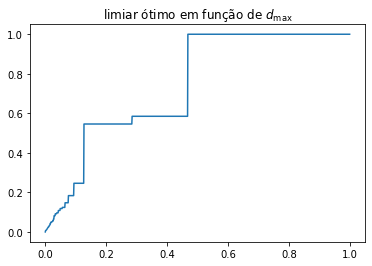

In [13]:
# Resposta do exercício 1

# begin gabarito

eps = 1e-3;

def c_ótimo(x,d):
    # usando busca binária: por construção sabemos que D(0)=0 e D(1)=max{D(c)}
    dummy,dummy,D1 = CompDescomp(x,1) # calcula D(1)
    if D1<=d: return 1
    # começa com o intervalo [cmin,cmax]=[0,1]
    cmin = 0; cmax = 1; cmed = (cmin+cmax)/2;
    dummy,dummy,Dcmed = CompDescomp(x,cmed) # Calcula D(cmed)
    while abs(cmax-cmin)>eps:
        if Dcmed>d: cmax = cmed
        else: cmin = cmed # pode ser feito sempre que D(cmed)<=d
        cmed = (cmin+cmax)/2;
        dummy,dummy,Dcmed = CompDescomp(x,cmed)
    return cmin # devolve cmin pois não há garantia de que D(cmed)<=d

D = np.arange(0,1,eps)
c = [ c_ótimo(x,d) for d in D ]
plt.plot(D,c);plt.title('limiar ótimo em função de $d_\max$');plt.show()

# end gabarito

### Melhorando o resultado da compressão

O exemplo do pulso quadrado é interessante por duas razões: ele traz a descontinuidade no interior do intervalo, o que representa um problema tanto para a DFT quanto para a DCT, mas ele também ilustra a melhor eficiência da DCT por eliminar a "descontinuidade da borda" (associada à repetição periódica do padrão implícita na DFT).

Uma forma de reduzir esse problema é aplicar uma estratégia segmentada para a compressão: se o sinal for segmentado em intervalos de tamanho $B$, apenas um desses intervalos conterá a descontinuidade em seu interior, e todos os demais intervalos devem ser muito mais fáceis de comprimir (pois são constantes nesse exemplo). Em outras palavras, $x=(x_0,\ldots,x_{N-1})$ será dividido em segmentos
$$x^{(m)}=\left\{\begin{array}{ll}
(x_{m*B},\ldots,x_{(m+1)*B-1})& m=0,1,\ldots,\lfloor N/B\rfloor-1,\\
(x_{m*B},\ldots,x_{N-1})& m=\lfloor N/B\rfloor\quad\mbox{(apenas se $B$ não divide $N$)},\\
\end{array}\right.$$
e cada segmento $x^{(m)}$ é comprimido de forma independente, usando os melhores limiares possíveis.


---

**Exercício 2:** 

**(a)** Escreva uma função <tt>CompDescompSegm(x,B)</tt> que recorte o sinal $x$ em segmentos de tamanho $B$ e aplique a estratégia de compressão em cada segmento, escolhendo o limiar ótimo em cada um deles de forma a garantir uma distorção relativa menor que $\delta=10^{-8}$ em cada segmento. Sua função deve devolver o sinal reconstruído $\tilde{x}$, a taxa de compressão $P$ e a distorção relativa $D$. Você pode considerar que $B$ divide $N$, de tal forma que o número de segmentos será exatamente $\frac{N}{B}$.

**Dica:** A taxa de compressão pode ser computada como a média dos valores $P_1(c_1),P_2(c_2),\ldots,P_M(c_M)$, e a distorção relativa deve ser calculada pela fórmula usual $D=\frac{\|x-\tilde{x}\|^2}{\|x\|^2}$ usando os vetores completos.

**(b)** Use sua função para construir dois gráficos separados, de $P$ e $D$ em função de $B=1,2,4,8,\ldots,N$. Comente na célula seguinte ao código sua interpretação para os perfis observados. Em particular, diga se existe um valor de $B$ que otimize a taxa de compressão $P$.

**Dica:** Use um eixo x logarítmico na base 2 para facilitar a visualização, com o comando <tt>ax[i].set_xscale('log',basex=2)</tt>

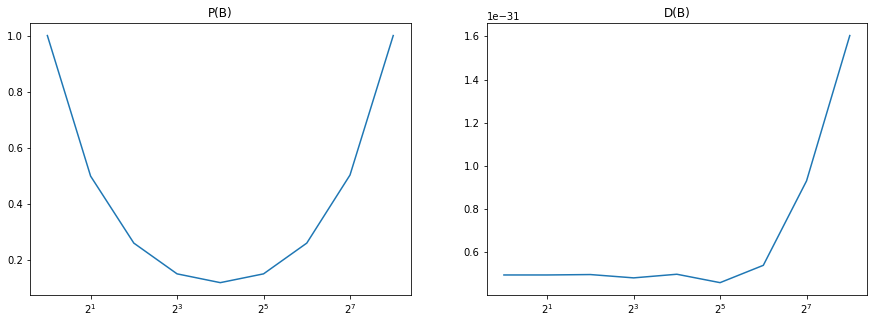

In [15]:
# Resposta do exercício 2

# begin gabarito

np.seterr(all='raise')
delta = 1e-8

def CompDescompSegm(x,B):
    P = 0
    xtil = []
    for m in range(N//B):
        # constrói segmento
        xm = x[m*B:(m+1)*B]
        # faz compressão ótima com distorção máxima delta
        c = c_ótimo(xm,delta)
        xtilm,Pc,Dc = CompDescomp(xm,c)
        xtil = np.append(xtil,xtilm)
        P += Pc
    P /= (N//B)
    D = np.linalg.norm(x-xtil)**2/np.linalg.norm(x)**2 # distorção relativa
    return xtil, P, D

# calcula os valores de P e D para B=1,2,4,8,...,N=256
M = int(m.log2(N))
B = [ 2**k for k in range(M+1)]
P = np.zeros(M+1)
D = np.zeros(M+1)
for i in range(len(B)):
    dummy, P[i], D[i] = CompDescompSegm(x,B[i])
    
# gera gráficos de P e D em função de B
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title(r'P(B)');ax[0].plot(B,P);ax[0].set_xscale('log',basex=2)
ax[1].set_title(r'D(B)');ax[1].plot(B,D);ax[1].set_xscale('log',basex=2)
plt.show()

# end gabarito

**Comentários da questão 2**

<tt># begin gabarito</tt>

Podemos ver que a taxa de compressão possui um comportamento em U com um mínimo em $B=16$. Esse comportamento provavelmente se deve ao fato de que para segmentos muito pequenos ($B=1,2$) há sempre algum coeficiente a se guardar em cada segmento (ao menos o nível dc), o que aumenta a taxa de ocupação do vetor comprimido. Por outro lado, com segmentos muito grandes ($B=64$ ou $128$) o trecho contendo a descontinuidade ainda é muito grande e esse é o principal trecho difícil de comprimir, exigindo a manutenção de muitos coeficientes.

Quanto à distorção, em princípio o código força uma distorção relativa baixa ($<\delta=10^{-8}$) dentro de todos os segmentos, o que é visível no cômputo geral (todos os valores são $<10^{-30}$). Talvez não seja seguro confiar em valores tão próximos da precisão da máquina para avaliar a aparente tendência de subida para $B=128$ e $B=256$.

<tt># end gabarito</tt>

---

## DCT 2D como DCT nas linhas e nas colunas de A

Já vimos no caso da DFT como é fácil pegar uma transformada arbitrária em $\mathbb{C}^n$ representada por uma matriz $\mathcal{T}_n$ com inversa $\tilde{\mathcal{T}}_n$ e convertê-la em uma transformada 2D em $\mathbb{C}^{m\times n}$ através da equação
$$\hat{A}=\mathcal{T}_mA\mathcal{T}_n^T,$$
cuja interpretação é aplicar a transformada nas linhas e nas colunas, e cuja inversão trivial é
$$A = \mathcal{\tilde{T}}_mA\mathcal{\tilde{T}}_n^T,$$
que consiste em destransformar linhas e colunas.

Naturalmente o mesmo ocorre com a DCT, cuja implementação bidimensional é dada pelo código abaixo:

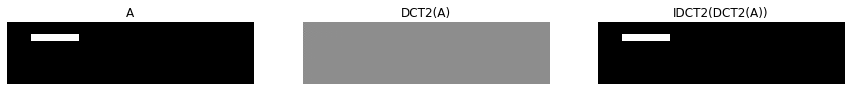

In [16]:
# transformada DCT em 2 dimensões
def dct2(A):
    # por construção, a implementação unidimensional se aplica a matrizes também,
    # mas ela apenas transforma as linhas de A
    B = dct(A, norm='ortho')
    # para transformar as colunas, usamos transposição para aproveitar a mesma implementação da dct
    C = dct(B.T, norm='ortho').T
    return C

# transformada IDCT em 2 dimensões
def idct2(A):
    # o mesmo processo da DCT, mas em uma linha só usando a implementação idct
    return idct(idct(A, norm='ortho').T, norm='ortho').T

# exemplo de uso
A = np.zeros((256,1024))
A[50:80,100:300] = 1
B = dct2(A)
C = idct2(B)
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title(r'A');ax[0].imshow(A, cmap='gray');ax[0].axis('off')
ax[1].set_title(r'DCT2(A)');ax[1].imshow(B, cmap='gray');ax[1].axis('off')
ax[2].set_title(r'IDCT2(DCT2(A))');ax[2].imshow(C, cmap='gray');ax[2].axis('off')
plt.show()

---

**Exercício 3:** Adapte o exemplo que antecede o exercício 1, usando o mecanismo de compressão por limiarização na figura do exemplo acima, para mostrar o sinal comprimido e reconstruído com $c=0.1$, e plote os gráficos de $P(c)$ e $D(c)$ para $c\in[0.001,0.1]$.

**Dica:** para achar o máximo de uma matriz M use <tt>np.max(np.max(M))</tt>, e use <tt>sum(sum(M))</tt> para a soma de seus elementos.

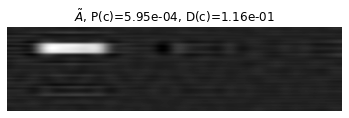

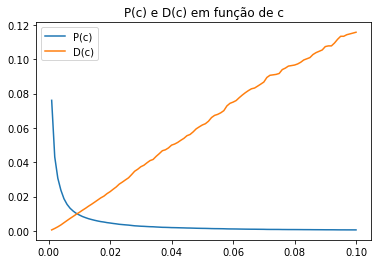

In [21]:
# Resposta do exercício 3

# begin gabarito

# realiza compressão/descompressão de x com parâmetro de limiarização c e devolve x~, Dc e Pc
def CompDescomp2(x,c):
    # calcula DCT e faz compressão por limiarização
    C=dct2(x)
    cM = c*np.max(np.max(abs(C))) # limiar de compressão
    CC = C*(abs(C)>=cM) # DCT comprimida
    xtil = idct2(CC) # sinal reconstruído
    Pc = sum(sum(abs(C)>=cM))/x.size # taxa de compressão (proporção de coeficientes mantidos)
    if np.linalg.norm(x)**2>0:
        Dc = np.linalg.norm(x-xtil)**2/np.linalg.norm(x)**2 # distorção relativa
    else:
        Dc = np.linalg.norm(x-xtil)**2 # calcula distorção absoluta se sinal é nulo
    return xtil,Pc,Dc

# realiza compressão/descompressão com c=0.1
Atil,Pc,Dc = CompDescomp2(A,0.1)

# gera gráficos de A, DCT(A) e Atil
plt.figure()
plt.title(r'$\tilde{{A}}$, P(c)={0:.2e}, D(c)={1:.2e}'.format(Pc,Dc));
plt.imshow(Atil, cmap='gray');plt.axis('off')
plt.show()

# gera gráficos de P(c) e D(c) usando a função CompDescomp2
eps = 1e-3
c = np.arange(eps,0.1+eps,eps)
Pc = np.zeros(len(c))
Dc = np.zeros(len(c))
for i in range(len(c)):
    dummy,Pc[i],Dc[i] = CompDescomp2(A,c[i])
plt.figure()
plt.title(r'P(c) e D(c) em função de c');
plt.plot(c,Pc,label='P(c)');plt.plot(c,Dc,label='D(c)');
plt.legend();plt.show();

# end gabarito